Importando Biblioteca Pandas e Numpy.

Importando Seaborn e Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

Carregando Dados.

In [2]:
dataframe1 = pd.read_excel('registros-prod.xlsx')


Visualizando DataFrame.

In [3]:
dataframe1.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822


Visualizando algumas informações sobre o DataFrame.

In [4]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


Nosso Dataframe não possui valores nulos.

In [5]:
dataframe1.isnull().sum()

QTD_CHOC       0
VAR_1          0
VAR_2          0
PESO_BOMBOM    0
dtype: int64

Nosso DataFrame não possui dados duplicados.

In [6]:
dataframe1.duplicated().sum()

0

Usando a funcão Dercribe para visualizar informações mais detalhadas.

In [7]:
dataframe1.describe(include='all')

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
count,500.000000,500.000000,500,500.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,C,NaN
freq,NaN,NaN,177,NaN
mean,291.264600,2.098180,NaN,10.395002
std,45.182499,0.711166,NaN,1.572233
min,112.910000,0.050000,NaN,4.543124
25%,259.267500,1.630000,NaN,9.425819
50%,295.450000,2.300000,NaN,10.334273
75%,325.137500,2.672500,NaN,11.379932


In [8]:
dataframe1.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


--------

ANALISE DESCRITIVA

Aqui nesta seção iremos analisar caracteristicas descritivas dos dados, como: 

 - Média
 - Mediana
 - Desvio Padrão
 - Plotar Gráficos com Matplotlib e Seaborn
 - Correlações
 - Existencia de dados faltantes, dados errados e dados repetidos
 - Identificação de Outliers e iremos pensar em como trata-los caso existam

----

In [9]:
dataframe1

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822
...,...,...,...,...
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321


Analisando colunas e identificando quais são os tipos de variaveis. 



* QTD_CHOC = numerica discreta  

* VAR1 = numerica discreta

* VAR2 = Categorica Nominal

* PESO_BOMBOM = numerica continua

* FORMULA = Categorica nominal

* PESO_IDEAL = Categorica nominal

* MEDIA_QTD_CHOC = Categorica nominal

-----

Observações 
* Não possuimos dados nulos, nem dados duplicados. 
* Observando os resultados obtidos pela função describle, não temos outliers.(Mas irei fazer mais algumas analise para concluir)
* Como são poucas variaveis, irei realizar alguns testes individuais mesclando as possibilidades para descobrir padrões.


-----

Usando scatterplot conseguimos visualizar que relacionando a variavel VAR_1 e PESO_BOMBOM (Sendo o ideal 10g) conseguimos ver um grande foco na região de valor 3.0.

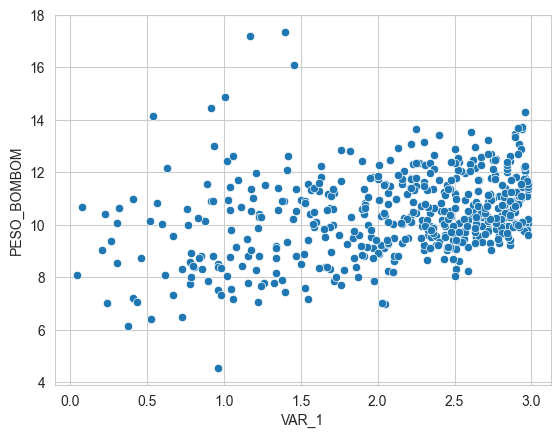

In [10]:
graf = sns.scatterplot(dataframe1, x= 'VAR_1', y='PESO_BOMBOM')
plt.show(graf)

---------




O processo de produção mal mapeado pode ser responsavel por levar a industria a ter mal faturamentos e quedas no mercado.

Quanto mais mapeado estão os procedimentos internos, formulas e treinamentos  mais alto é o nivel de desempenho desta industria.

Observando os dados, minha tese inicial é que a chave para um resultado de precisão vai envolver todas as colunas.

Vamos analisar profundamente cada variavel.

Analisando VAR_1.

Conseguimos observar que ela percorre por 3 casas de unidade. Realizei uma divisão entre elas criando uma coluna nomeada 'FORMULA'. Separando-as em 3 partes 
* Menor que 1.0 = Basica.
* Maior ou igual a 1.01 = Especial.
* Maior ou igual a 2.01 = Avançada.

Possuir um bom formulador e seguir no detalhe recomendações das formulas, garante muito a precisão do produto final a ser produzido.
 
Se ja existe, podemos nos aprofundar em uma proxima call. Se não existe, a ideia central deste assunto ja pode ficar em aberto para um possivel trabalho a ser feito.


------

Como passo inicial, Irei criar algumas colunas para fazer testes futuramente. Atribuindo a estas colunas faixas / medias dos valores oficiais. 


---

Transformando coluna VAR_1 em uma coluna com caixas de cageroias, nomeada = Formula.

In [11]:
dataframe1.loc[dataframe1['VAR_1']<1.00,'FORMULA']='basic'
dataframe1.loc[dataframe1['VAR_1']>=1.01,'FORMULA']='special'
dataframe1.loc[dataframe1['VAR_1']>=2.01,'FORMULA']='advanced'

----

Irei criar uma coluna com o nome de 'MEDIA_QTD_CHOC' com a função de mostrar a margem de chocolate utilizada.

Alem de nos mostrar a quantidade de chocolate utilizada naquele lote, conseguimos interpretar qual a variabilidade no processo.

A partir deste feito, conseguimos olhar com mais precisão para as colunas e decidir quais são as variaveis com mais relevantes a se trabalhar.

In [12]:
dataframe1.loc[dataframe1['QTD_CHOC']<150,'MEDIA_QTD_CHOC']='M100'
dataframe1.loc[dataframe1['QTD_CHOC']>=151,'MEDIA_QTD_CHOC']='M150'
dataframe1.loc[dataframe1['QTD_CHOC']>=201,'MEDIA_QTD_CHOC']='M200'
dataframe1.loc[dataframe1['QTD_CHOC']>=251,'MEDIA_QTD_CHOC']='M250'
dataframe1.loc[dataframe1['QTD_CHOC']>=301,'MEDIA_QTD_CHOC']='M300'
dataframe1.loc[dataframe1['QTD_CHOC']>=351,'MEDIA_QTD_CHOC']='M350'
dataframe1.loc[dataframe1['QTD_CHOC']>=401,'MEDIA_QTD_CHOC']='M400'



-----

Tendo em vista que o principal problema que a industria enfrenta é a variabilidade no processo.

Irei criar uma coluna com o nome de 'PESO_IDEAL' com a função de mostrar o status final do peso do bombom.

A partir deste feito, conseguimos olhar com mais precisão para as colunas e decidir quais são as variaveis com mais relevantes a se trabalhar.

In [13]:
dataframe1.loc[dataframe1['PESO_BOMBOM']<10.1,'PESO_IDEAL']='approved by QC'
dataframe1.loc[dataframe1['PESO_BOMBOM']>=9.90,'PESO_IDEAL']='approved by QC'
dataframe1.loc[dataframe1['PESO_BOMBOM']<9.90,'PESO_IDEAL']='rejected by QC'
dataframe1.loc[dataframe1['PESO_BOMBOM']>10.0,'PESO_IDEAL']='changed final value'

Irei demonstrar graficamente agora as 2 variaveis classificadas
(FORMULA E PESO IDEAL)



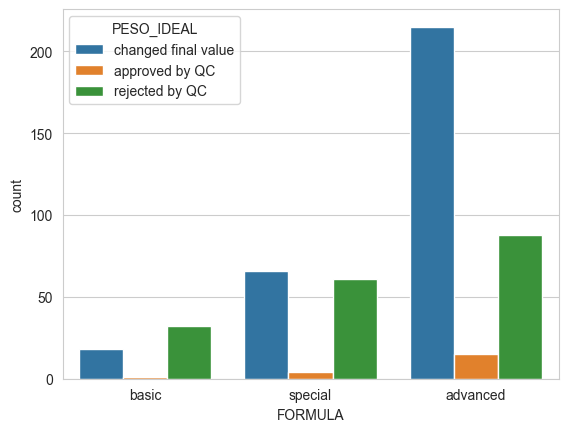

In [14]:
fig1 = sns.countplot(dataframe1,x='FORMULA',hue='PESO_IDEAL')
plt.show(fig1)

In [15]:
Fadvan = round(dataframe1['PESO_IDEAL'][dataframe1['FORMULA']=='advanced'].value_counts(normalize=True).loc[:]*100)
print(f"Usando a formulação avançada tivemos as seguintes resultados finais :\n{Fadvan}")


Usando a formulação avançada tivemos as seguintes resultados finais :
PESO_IDEAL
changed final value    68.0
rejected by QC         28.0
approved by QC          5.0
Name: proportion, dtype: float64


In [16]:
Fspec = round(dataframe1['PESO_IDEAL'][dataframe1['FORMULA']=='special'].value_counts(normalize=True).loc[:]*100)
print(f"Usando a formulação Special tivemos as seguintes resultados finais :\n{Fspec}")

Usando a formulação Special tivemos as seguintes resultados finais :
PESO_IDEAL
changed final value    50.0
rejected by QC         47.0
approved by QC          3.0
Name: proportion, dtype: float64


In [17]:
Fbasic = round(dataframe1['PESO_IDEAL'][dataframe1['FORMULA']=='basic'].value_counts(normalize=True).loc[:]*100)
print(f"Usando a formulação Basic tivemos as seguintes resultados finais :\n{Fbasic}")

Usando a formulação Basic tivemos as seguintes resultados finais :
PESO_IDEAL
rejected by QC         63.0
changed final value    35.0
approved by QC          2.0
Name: proportion, dtype: float64


Atraves desta analise conseguimos concluir que usando a formulação 'basica' o resultado foi o mais  negativo.

Iremos observar de forma mais profunda os atributos de formulação 'special' e 'avançada'.

-----



Irei inverter a ordem  das variaveis para descobrir qual a porcentagem de aprovação das  formulas quando o status é dado como 'Aprovado pelo CQ'.




Graficamente isso nos confirma que a maior parte dos resultados 'aprovados pelo CQ' foram envolvendo a formula 'avançada'.

Para concluirmos esta linha de raciocinio, irei trazer representações em porcentagem. 

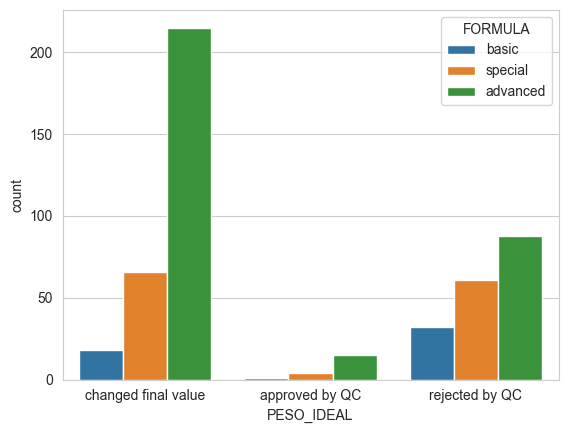

Em casos em que o status final do produto é dado como 'Aprovado pelo CQ'(processo rodando 100% programado!).
Segue porcentagem de cada formulação.
FORMULA
advanced    75.0
special     20.0
basic        5.0
Name: proportion, dtype: float64 


In [18]:
fig2 = sns.countplot(dataframe1,x='PESO_IDEAL',hue = 'FORMULA')
plt.show(fig2)

aprove2 = round(dataframe1['FORMULA'][dataframe1['PESO_IDEAL']=='approved by QC'].value_counts(normalize=True).loc[:]*100)
print(f"Em casos em que o status final do produto é dado como 'Aprovado pelo CQ'(processo rodando 100% programado!).\nSegue porcentagem de cada formulação.\n{aprove2} ")

Concluimos que dentre esse raciocinio a formula com mais taxa de aprovação é a 'avançada'.

------

Acionando 'VAR_2'com a coluna 'PESO_IDEAL'


Conseguimos ver uma forte visualização para a opção(C) e (B)

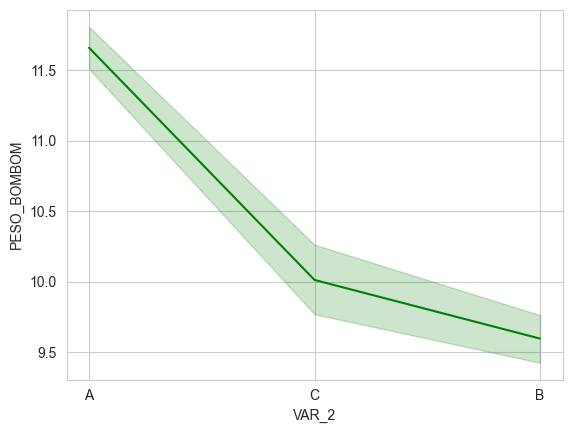

In [19]:
graf_linha_var2 = sns.lineplot(data=dataframe1, x='VAR_2', y='PESO_BOMBOM',color = 'green')
plt.show(graf_linha_var2)

Irei desmonstrar graficamente as variaveis( VAR_2 e PESO_IDEAL) para conseguir me aprofundar  na analise.

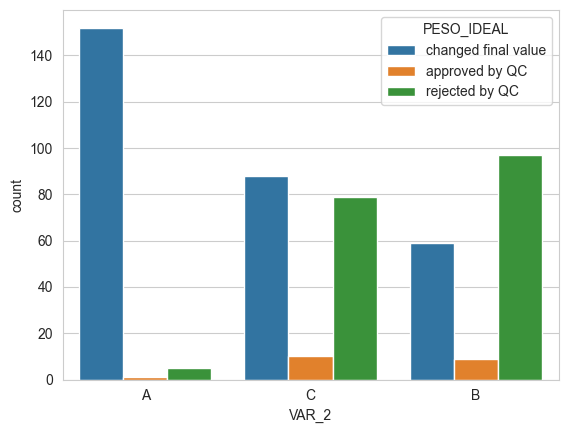

In [20]:
fig3 = sns.countplot(dataframe1,x='VAR_2',hue = 'PESO_IDEAL')
plt.show(fig3)

In [21]:
VAR_A = round(dataframe1['PESO_IDEAL'][dataframe1['VAR_2']=='A'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'A' tivemos ao seguintes resultados finais em porcentagem =\n{VAR_A}")

Usando o atributo 'A' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
changed final value    96.0
rejected by QC          3.0
approved by QC          1.0
Name: proportion, dtype: float64


In [22]:
VAR_B = round(dataframe1['PESO_IDEAL'][dataframe1['VAR_2']=='B'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'B' tivemos ao seguintes resultados finais em porcentagem =\n{VAR_B}")

Usando o atributo 'B' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
rejected by QC         59.0
changed final value    36.0
approved by QC          5.0
Name: proportion, dtype: float64


In [23]:
VAR_C = round(dataframe1['PESO_IDEAL'][dataframe1['VAR_2']=='C'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'C' tivemos ao seguintes resultados finais em porcentagem =\n{VAR_C}")

Usando o atributo 'C' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
changed final value    50.0
rejected by QC         45.0
approved by QC          6.0
Name: proportion, dtype: float64


Atraves desta analise conseguimos concluir que usando o atributo 'A', foi o resultado mais negativo.
Iremos trabalhar agora em cima do atributo 'B' e 'C'.

---

Irei inverter a ordem  das variaveis para descobrir qual a porcentagem de aprovação dos atributos da coluna VAR_2 quando o status é dado como 'Aprovado pelo CQ'.


Graficamente isso nos confirma que a maior parte dos resultados 'aprovados pelo CQ' foram envolvendo  o atributo  'C'

Para concluirmos esta linha de raciocinio, irei trazer representações em porcentagem. 

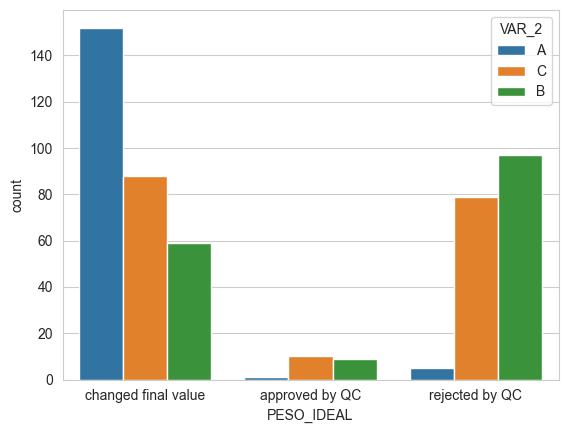

Em casos em que o status final do produto é dado como 'Aprovado pelo CQ'(processo rodando 100% programado!).
Segue porcentagem de cada atributo
VAR_2
C    50.0
B    45.0
A     5.0
Name: proportion, dtype: float64 


In [24]:
fig4 = sns.countplot(dataframe1,x='PESO_IDEAL',hue = 'VAR_2')
plt.show(fig4)

aprove3 = round(dataframe1['VAR_2'][dataframe1['PESO_IDEAL']=='approved by QC'].value_counts(normalize=True).loc[:]*100)
print(f"Em casos em que o status final do produto é dado como 'Aprovado pelo CQ'(processo rodando 100% programado!).\nSegue porcentagem de cada atributo\n{aprove3} ")

----

Até o momento o que mais fortalece esta tese inicial é que a formulação 'avançada' combinada com o atributo 'C'da VAR_2 .

Leva até um resultado mais integro e esperado.

------

Irei vincular em um grafico a coluna 'MEDIA_QTD_CHOC' para termos base de qual a media que mais aparenta levar ao resultado seguro e consequentemente testarmos.


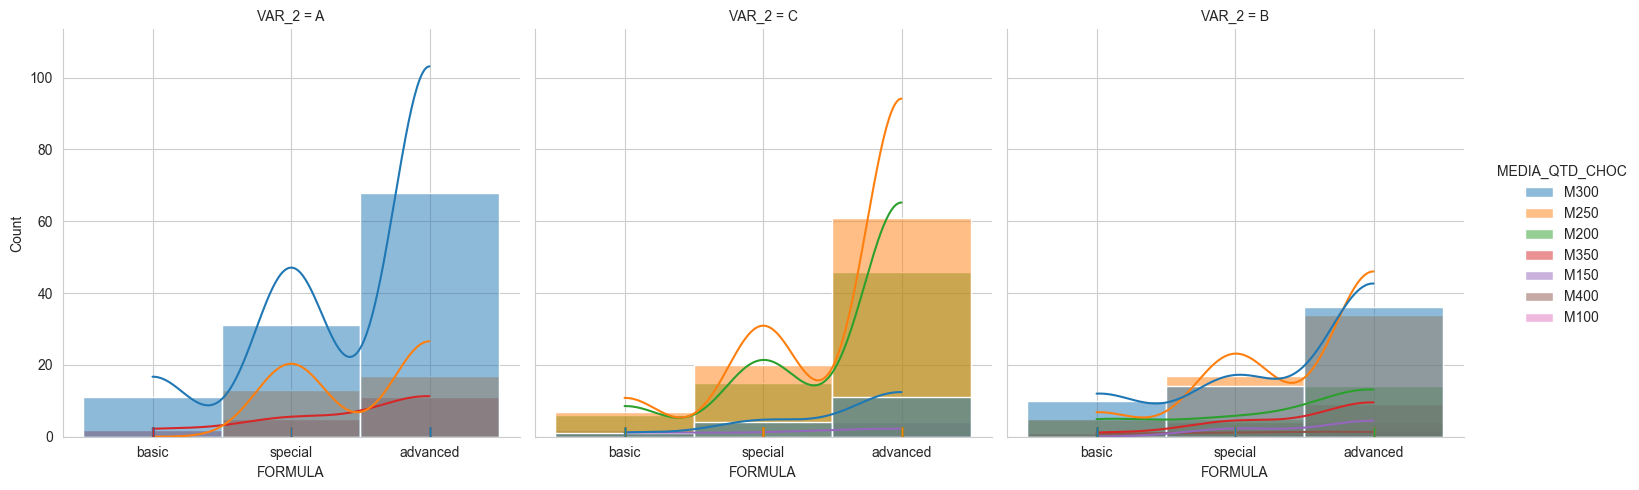

In [25]:
fig5 = sns.displot(dataframe1, x='FORMULA',hue='MEDIA_QTD_CHOC',col='VAR_2',rug=True, kde= True)
plt.show(fig5)

Faixa de 301 a 350 visualmente é a que mais se destaca, irei ver em relação a porcentagem.


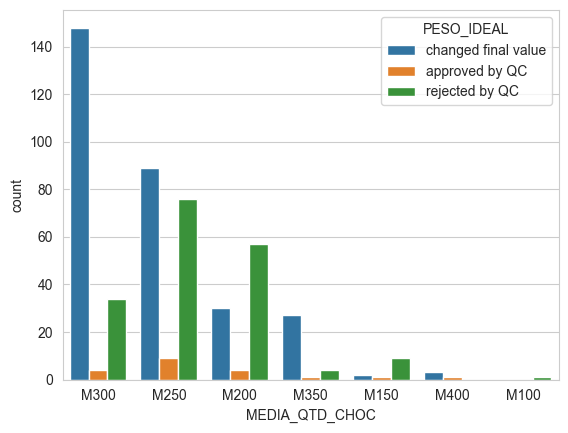

In [26]:
fig6 = sns.countplot(dataframe1,x='MEDIA_QTD_CHOC',hue = 'PESO_IDEAL')
plt.show(fig6)

In [27]:
FAIXA1 = round(dataframe1['PESO_IDEAL'][dataframe1['MEDIA_QTD_CHOC']=='M100'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'DE 100 A 150' tivemos ao seguintes resultados finais em porcentagem =\n{FAIXA1}")

Usando o atributo 'DE 100 A 150' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
rejected by QC    100.0
Name: proportion, dtype: float64


In [28]:
FAIXA2 = round(dataframe1['PESO_IDEAL'][dataframe1['MEDIA_QTD_CHOC']=='M150'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'DE 151 A 200' tivemos ao seguintes resultados finais em porcentagem =\n{FAIXA2}")

Usando o atributo 'DE 151 A 200' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
rejected by QC         75.0
changed final value    17.0
approved by QC          8.0
Name: proportion, dtype: float64


In [29]:
FAIXA3 = round(dataframe1['PESO_IDEAL'][dataframe1['MEDIA_QTD_CHOC']=='M200'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'DE 201 A 250' tivemos ao seguintes resultados finais em porcentagem =\n{FAIXA3}")

Usando o atributo 'DE 201 A 250' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
rejected by QC         63.0
changed final value    33.0
approved by QC          4.0
Name: proportion, dtype: float64


In [30]:
FAIXA4 = round(dataframe1['PESO_IDEAL'][dataframe1['MEDIA_QTD_CHOC']=='M250'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'DE 251 A 300' tivemos ao seguintes resultados finais em porcentagem =\n{FAIXA4}")

Usando o atributo 'DE 251 A 300' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
changed final value    51.0
rejected by QC         44.0
approved by QC          5.0
Name: proportion, dtype: float64


In [31]:
FAIXA5 = round(dataframe1['PESO_IDEAL'][dataframe1['MEDIA_QTD_CHOC']=='M300'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'DE 301 A 350' tivemos ao seguintes resultados finais em porcentagem =\n{FAIXA5}")

Usando o atributo 'DE 301 A 350' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
changed final value    80.0
rejected by QC         18.0
approved by QC          2.0
Name: proportion, dtype: float64


In [32]:
FAIXA6 = round(dataframe1['PESO_IDEAL'][dataframe1['MEDIA_QTD_CHOC']=='M350'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'DE 351 A 400' tivemos ao seguintes resultados finais em porcentagem =\n{FAIXA6}")

Usando o atributo 'DE 351 A 400' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
changed final value    84.0
rejected by QC         12.0
approved by QC          3.0
Name: proportion, dtype: float64


In [33]:
FAIXA7 = round(dataframe1['PESO_IDEAL'][dataframe1['MEDIA_QTD_CHOC']=='M400'].value_counts(normalize=True).loc[:]*100)
print(f"Usando o atributo 'DE 401 A 450' tivemos ao seguintes resultados finais em porcentagem =\n{FAIXA7}")

Usando o atributo 'DE 401 A 450' tivemos ao seguintes resultados finais em porcentagem =
PESO_IDEAL
changed final value    75.0
approved by QC         25.0
Name: proportion, dtype: float64


A seguir irei inverter a ordem das 2 variaveis (PESO_IDEAL) e (MEDIA_QTD_CHOC) para visualizar graficamente estas observações a seguir.


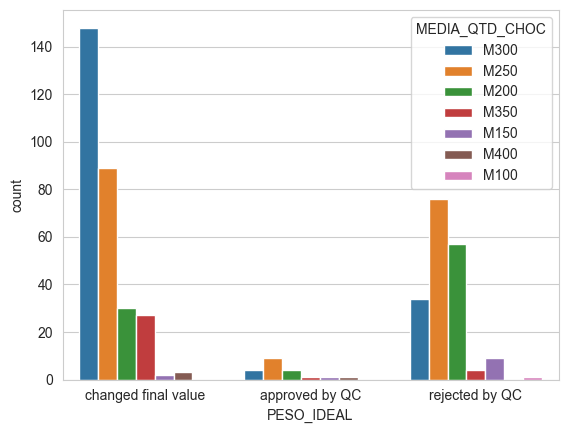

In [34]:
fig7 = sns.countplot(dataframe1,x='PESO_IDEAL',hue = 'MEDIA_QTD_CHOC')
plt.show(fig7)

O Atributo da coluna 'FAIXA_QTD_CHOC' que esta mais se destacando é o de 251 a 300 com 5% de aprovada.  porem a taxa de reprovado está em 44 %. 

Podemos visualizar atraves desta analise  que, quanto mais chocolate utilizamos, mais baixo é a taxa de reprovado pelo CQ.


Como são poucos dados no atributo que nos trouxe 25 % de aprovados (400 a 450 ) não se torna uma verdade absoluta.

Irei levar em consideração o atributo de 300 a 350 como maior potencial. Ja que M200 tem a taxa de rejeição muito alta.


Incontestavelmente por diversas analises. Esta é uma coluna muito importante e a linha de acertivade no meu ponto de vista está focada para cada vez mais que vc usa chocolate menos rejeição pela qualidade se tem.

-------

--------

-----

In [35]:
dataframe1

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,FORMULA,MEDIA_QTD_CHOC,PESO_IDEAL
0,320.15,0.88,A,10.144919,basic,M300,changed final value
1,320.14,1.55,A,11.547027,special,M300,changed final value
2,284.85,2.97,A,11.112109,advanced,M250,changed final value
3,263.92,2.36,C,9.900123,advanced,M250,approved by QC
4,276.22,2.98,C,10.079822,advanced,M250,changed final value
...,...,...,...,...,...,...,...
495,301.01,1.59,A,10.471494,special,M300,changed final value
496,331.41,2.60,A,12.048504,advanced,M300,changed final value
497,311.08,0.38,C,6.128060,basic,M300,rejected by QC
498,315.56,1.89,B,9.198321,special,M300,rejected by QC


In [36]:
var_2 = pd.get_dummies(dataframe1['VAR_2'],prefix='VAR_2',drop_first=True)
var_f = pd.get_dummies(dataframe1['FORMULA'],prefix='FORMULA',drop_first=True)
var_m = pd.get_dummies(dataframe1['MEDIA_QTD_CHOC'],prefix='MEDIA_QTD_CHOC',drop_first=True)

In [37]:
dataframe1

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,FORMULA,MEDIA_QTD_CHOC,PESO_IDEAL
0,320.15,0.88,A,10.144919,basic,M300,changed final value
1,320.14,1.55,A,11.547027,special,M300,changed final value
2,284.85,2.97,A,11.112109,advanced,M250,changed final value
3,263.92,2.36,C,9.900123,advanced,M250,approved by QC
4,276.22,2.98,C,10.079822,advanced,M250,changed final value
...,...,...,...,...,...,...,...
495,301.01,1.59,A,10.471494,special,M300,changed final value
496,331.41,2.60,A,12.048504,advanced,M300,changed final value
497,311.08,0.38,C,6.128060,basic,M300,rejected by QC
498,315.56,1.89,B,9.198321,special,M300,rejected by QC


In [38]:
dataframe1_oficial = pd.concat([dataframe1,var_2,var_f,var_m],axis=1)


In [39]:
dataframe1_oficial33 = pd.DataFrame() 

In [40]:
dataframe1_oficial2 = dataframe1_oficial.copy() #salvando copia



In [41]:
dataframe1_oficial.drop(['QTD_CHOC','VAR_1','PESO_BOMBOM','FORMULA','MEDIA_QTD_CHOC','VAR_2'],axis=1,inplace=True)

In [42]:
dataframe1_oficial2

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,FORMULA,MEDIA_QTD_CHOC,PESO_IDEAL,VAR_2_B,VAR_2_C,FORMULA_basic,FORMULA_special,MEDIA_QTD_CHOC_M150,MEDIA_QTD_CHOC_M200,MEDIA_QTD_CHOC_M250,MEDIA_QTD_CHOC_M300,MEDIA_QTD_CHOC_M350,MEDIA_QTD_CHOC_M400
0,320.15,0.88,A,10.144919,basic,M300,changed final value,False,False,True,False,False,False,False,True,False,False
1,320.14,1.55,A,11.547027,special,M300,changed final value,False,False,False,True,False,False,False,True,False,False
2,284.85,2.97,A,11.112109,advanced,M250,changed final value,False,False,False,False,False,False,True,False,False,False
3,263.92,2.36,C,9.900123,advanced,M250,approved by QC,False,True,False,False,False,False,True,False,False,False
4,276.22,2.98,C,10.079822,advanced,M250,changed final value,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,301.01,1.59,A,10.471494,special,M300,changed final value,False,False,False,True,False,False,False,True,False,False
496,331.41,2.60,A,12.048504,advanced,M300,changed final value,False,False,False,False,False,False,False,True,False,False
497,311.08,0.38,C,6.128060,basic,M300,rejected by QC,False,True,True,False,False,False,False,True,False,False
498,315.56,1.89,B,9.198321,special,M300,rejected by QC,True,False,False,True,False,False,False,True,False,False


In [43]:
from sklearn.model_selection import train_test_split
preditores = dataframe1_oficial.drop(['PESO_IDEAL'],axis=1)
alvo = dataframe1_oficial['PESO_IDEAL']
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST= train_test_split(preditores,alvo,test_size=0.25,random_state=10)


In [44]:
### Random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


randomforest= RandomForestClassifier()
randomforest.fit(X_TRAIN,Y_TRAIN)
Y_predict = randomforest.predict(X_TEST)
acuracia_randomforest = round(accuracy_score(Y_predict,Y_TEST)*100, 2)
print(f'Acuracia de - > {acuracia_randomforest}')

Acuracia de - > 80.0


In [45]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=1000) 
logistic_reg.fit(X_TRAIN,Y_TRAIN)
Y_predict2= logistic_reg.predict(X_TEST)
acuracia_logistic_reg = round(accuracy_score(Y_predict2, Y_TEST)*100 ,2)
print(f'Acuracia de - > {acuracia_logistic_reg}')

Acuracia de - > 74.4


In [46]:
## Gradient Boosting Classifier 

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit (X_TRAIN,Y_TRAIN)
Y_predict3 = gbc.predict(X_TEST)
acuracia_gbc = round(accuracy_score(Y_predict3,Y_TEST)*100,2)
print(f'Acuracia de -> {acuracia_gbc}')


Acuracia de -> 79.2


In [47]:
#Stochastic Gradient Descent
from sklearn.svm import SVC

svc = SVC() 
svc.fit(X_TRAIN,Y_TRAIN)
Y_predict4 = svc.predict(X_TEST)
acuracia_svc = round(accuracy_score(Y_predict4,Y_TEST)*100,2)
print(f'Acuracia de -> {acuracia_gbc}')


Acuracia de -> 79.2


In [48]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier



dtreee= DecisionTreeClassifier()
dtreee.fit(X_TRAIN,Y_TRAIN)
Y_predict5= dtreee.predict(X_TEST)
acuracia_dtree = round(accuracy_score(Y_predict5,Y_TEST)*100,2)
print(f'Acuracia de -> {acuracia_dtree}')


Acuracia de -> 79.2


In [49]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier()
knn.fit(X_TRAIN,Y_TRAIN)
Y_predict6=knn.predict(X_TEST)
acuracia_knn = round(accuracy_score(Y_predict6,Y_TEST)*100,2)
print(f'Acuracia de -> {acuracia_knn}')

Acuracia de -> 78.4


In [50]:
dataframe1_oficial2['PESO_IDEAL'] = dataframe1_oficial2['PESO_IDEAL'].map({'rejected by QC':0,'changed final value':0,'approved by QC':1})

In [51]:
dataframe1_oficial2

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,FORMULA,MEDIA_QTD_CHOC,PESO_IDEAL,VAR_2_B,VAR_2_C,FORMULA_basic,FORMULA_special,MEDIA_QTD_CHOC_M150,MEDIA_QTD_CHOC_M200,MEDIA_QTD_CHOC_M250,MEDIA_QTD_CHOC_M300,MEDIA_QTD_CHOC_M350,MEDIA_QTD_CHOC_M400
0,320.15,0.88,A,10.144919,basic,M300,0,False,False,True,False,False,False,False,True,False,False
1,320.14,1.55,A,11.547027,special,M300,0,False,False,False,True,False,False,False,True,False,False
2,284.85,2.97,A,11.112109,advanced,M250,0,False,False,False,False,False,False,True,False,False,False
3,263.92,2.36,C,9.900123,advanced,M250,1,False,True,False,False,False,False,True,False,False,False
4,276.22,2.98,C,10.079822,advanced,M250,0,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,301.01,1.59,A,10.471494,special,M300,0,False,False,False,True,False,False,False,True,False,False
496,331.41,2.60,A,12.048504,advanced,M300,0,False,False,False,False,False,False,False,True,False,False
497,311.08,0.38,C,6.128060,basic,M300,0,False,True,True,False,False,False,False,True,False,False
498,315.56,1.89,B,9.198321,special,M300,0,True,False,False,True,False,False,False,True,False,False


In [52]:
from sklearn.model_selection import train_test_split
preditoress = dataframe1_oficial2.drop(['PESO_IDEAL'],axis=1)
alvoo = dataframe1_oficial2['PESO_IDEAL']
x_TRAIN,x_TEST,y_TRAIN,y_TEST= train_test_split(preditoress,alvoo,test_size=0.25,random_state=10)


In [53]:
### Random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

randomforestt= RandomForestClassifier()
randomforestt.fit(x_TRAIN,y_TRAIN)
y_predict8 = randomforestt.predict(x_TEST)
acuracia_randomforestt = round(accuracy_score(y_predict8,y_TEST)*100, 2)
print(f'Acuracia de - > {acuracia_randomforestt}')

ValueError: could not convert string to float: 'B'